In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
# Load csv file
df = pd.read_csv('data2/feedback.csv')
# Add index column
df.reset_index(inplace=True)
# Rename columns
df.columns = 'feedback_id user_id outfit_id style_category_id weather_category_id feedback_category_id'.split()
#df.transpose()

## Actual feedback

In [112]:
# Feedback dictionary
feedback = {
    2: "Don't like",
    3: "Like",
    4: "Wore it"
}

# Feedback category dictionary 
df_feedcat = pd.DataFrame(feedback, index=['feedback_category_name']).transpose()
# Add index column
df_feedcat.reset_index(inplace=True)
df_feedcat.columns = 'feedback_category_id feedback_category_name'.split()
df_feedcat

,feedback_category_id,feedback_category_name
0,2,Don't like
1,3,Like
2,4,Wore it


In [146]:
tmpdf = pd.DataFrame(data=[[-1, -1]], index = [-1], columns=['feedback_id','feedback_category_id'])
tmpdf

,feedback_id,feedback_category_id
-1,-1,-1


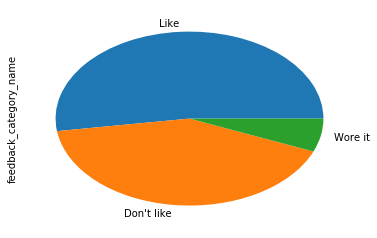

In [156]:
# Simple "feedback" plot
df_indf = df[['feedback_id','feedback_category_id']]
#for i in range(1000):
#    df_indf = df_indf.append(tmpdf)
#df_indf.transpose()

# Left outer join.
df_merged =pd.merge(df_indf,df_feedcat,how='left',on='feedback_category_id')
df_merged.transpose()

df_merged['feedback_category_name'].fillna('Unknown').value_counts().plot.pie()
plt.show()

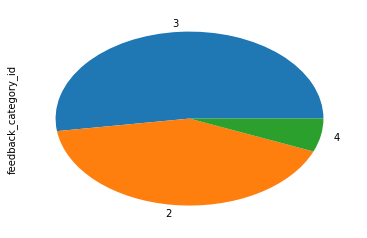

In [159]:
# "Original" data
df['feedback_category_id'].value_counts().plot.pie()
plt.show()

## Style

In [157]:
# Style dictionary
style = {
    1: "Casual",
    2: "Grunge",
    3: "Business",
    4: "Glam",
    5: "Boho",
    6: "Artsy",
    7: "Smart Casual"
}

# Feedback category dictionary 
df_stylecat = pd.DataFrame(style, index=['style_category_name']).transpose()
# Add index column
df_stylecat.reset_index(inplace=True)
df_stylecat.columns = 'style_category_id style_category_name'.split()
df_stylecat

,style_category_id,style_category_name
0,1,Casual
1,2,Grunge
2,3,Business
3,4,Glam
4,5,Boho
5,6,Artsy
6,7,Smart Casual


In [175]:
df[['feedback_id','style_category_id']].groupby('style_category_id').describe().transpose()

#df[["feedback_id","style_category_id"]].transpose()

style_category_id           0.0           1.0           3.0           4.0  \
feedback_id count  19249.000000  13633.000000   7318.000000   9062.000000   
            mean   57092.812666  50112.907724  46667.616562  46270.771794   
            std    26784.712077  25358.224026  25421.953040  26488.635643   
            min     6733.000000   6806.000000   6808.000000   6839.000000   
            25%    29899.000000  24852.000000  22038.500000  21289.500000   
            50%    62594.000000  54166.000000  51047.500000  49806.500000   
            75%    82662.000000  73278.000000  70739.250000  71013.750000   
            max    91192.000000  91184.000000  91175.000000  91189.000000   

style_category_id           7.0  
feedback_id count  19218.000000  
            mean   46135.301852  
            std    25591.578869  
            min     6805.000000  
            25%    21292.250000  
            50%    50142.500000  
            75%    70916.750000  
            max    91190.000000

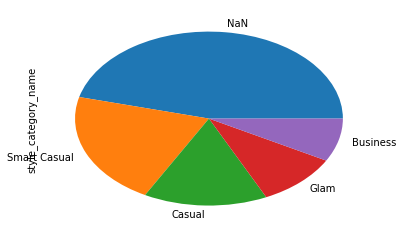

In [193]:
# Left outer join.
pd.merge(df,df_stylecat,how='left',on='style_category_id')["style_category_name"].fillna("NaN").value_counts().plot.pie()
plt.show()

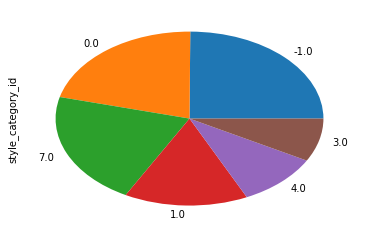

In [161]:
# Simple "style" plot of original data
df["style_category_id"].fillna(-1).value_counts().plot.pie()
plt.show()


## Weather

In [187]:
# Weather dictionary
weather = {
#        -1: "Unknown",
        1: "Freezing",
        2: "Cold",
        3: "Chilly",
        4: "Fresh",
        5: "Warm",
        6: "Hot",
        7: "Wind",
        8: "Rain",
        9: "Snow"
    }
#weather[-1]

In [188]:
# Weather category dictionary 
df_weathercat = pd.DataFrame(weather, index=['weather_category_name']).transpose()
# Add index column
df_weathercat.reset_index(inplace=True)
df_weathercat.columns = 'weather_category_id weather_category_name'.split()
df_weathercat

,weather_category_id,weather_category_name
0,1,Freezing
1,2,Cold
2,3,Chilly
3,4,Fresh
4,5,Warm
5,6,Hot
6,7,Wind
7,8,Rain
8,9,Snow


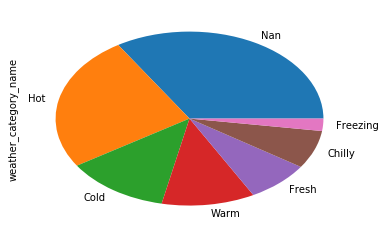

In [192]:
# Left outer join.
pd.merge(df,df_weathercat,how='left',on='weather_category_id')["weather_category_name"].fillna("Nan").value_counts().plot.pie()
plt.show()

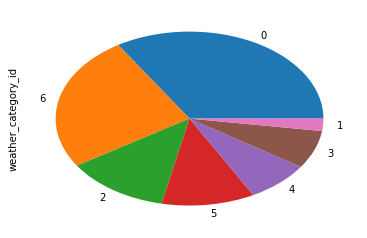

In [195]:
# Simple "weather" plot
df["weather_category_id"].fillna(-1).value_counts().plot.pie()
plt.show()